In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

4431872/4422102 [==============================] - 0s 0us/step
Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


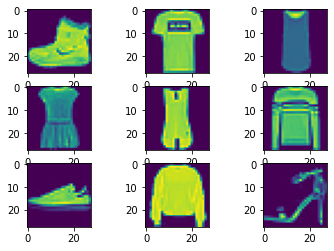

In [2]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data() 
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense , Dropout 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import numpy as np
x_train= x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='Softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 12s 24ms/step - loss: 0.4861 - accuracy: 0.8229 - val_loss: 0.4017 - val_accuracy: 0.8561
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 0.3779 - accuracy: 0.8614 - val_loss: 0.4198 - val_accuracy: 0.8493
Epoch 3/50
469/469 [==============================] - 12s 25ms/step - loss: 0.3457 - accuracy: 0.8729 - val_loss: 0.3874 - val_accuracy: 0.8600
Epoch 4/50
469/469 [==============================] - 11s 24ms/step - loss: 0.3256 - accuracy: 0.8807 - val_loss: 0.4046 - val_accuracy: 0.8546
Epoch 5/50
469/469 [==============================] - 12s 25ms/step - loss: 0.3129 - accuracy: 0.8859 - val_loss: 0.3729 - val_accuracy: 0.8739
Epoch 6/50
469/469 [==============================] - 11s 23ms/step - loss: 0.3010 - accuracy: 0.8904 - val_loss: 0.4161 - val_accuracy: 0.8725
Epoch 7/50
469/469 [==============================] - 12s 25ms/step - loss: 0.2963 - accuracy: 0.8933 - val_loss: 0.3968 - val_accuracy:

In [7]:
model.save('fashion_ann.h5')

In [8]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.2611 - accuracy: 0.8926


[1.2610771656036377, 0.8925999999046326]

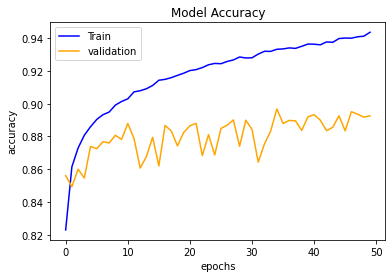

In [9]:
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_fashion= load_model('fashion_ann.h5')